### Graph theory in communication and networks - Spring'16 project

# Dynamic Communities in Evolving Network Graphs

### Joseph P. Macker, David J. Claypool

In [3]:
import time
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eigh
%matplotlib inline
import random

In [4]:
from Pycluster import *

In [45]:
def sct(G,x1,pos={}):
    
    L=nx.normalized_laplacian_matrix(G).todense() #normalized laplacian
    
    el,U= eigh(L) #spectral decomposition
    
    #Eigengap heuristic - K value decision
    
    l=len(el)
    eld=[]
    for i in range(l-1):
        eld += [el[i+1]-el[i]] #Eigengap values

    for j in range(len(eld)):
        if (eld[j]==max(eld)):
            elm = eld[j] #Max eigenvale
            k=j+1    #k - number of clusters
    
    ela = np.mean(eld) #Average value of eigengap values
    
    pq = elm/ela #Effectiveness of partitioning
    
    #print('K = ',k,' Clustering quality = ',pq)
    
    U1=U[:,1:k] #K eigenvectors
    
    clusterid, error, nfound = kcluster (U1, nclusters=k)
    
    #print(clusterid,error,nfound)
    
    x=x1
    
    if(x==1):  
        if pos:
            plt.figure()
            nx.draw_networkx_nodes(G,pos=pos,node_color=clusterid,alpha=0.5,with_labels=True)
            fig=plt.gcf()
            fig.set_size_inches(5,5)

        else: 
            nx.draw(G,node_color=colors,alpha=0.5)
    
    
    return k,pq

In [46]:
def graphpos(m):
    pos={}
    
    #means=[[0,0],[5,8],[8,0],[3,-1],[0,6]]
    means1=[[0,0],[5,8],[8,0],[3,-1],[0,6],[3,-3]]

    #m=random.randint(1,n)
    #m=n*random.random()
    
    for node in range(60):
        cluster=random.randint(0,5) #inclusive of two points
        nodemean=means1[cluster]
        nodepos=tuple([coord+(m)*random.random() for coord in nodemean])
        pos[node]=nodepos

    G=nx.Graph()
    G.nodes(60)
    for u in range(len(pos)):
        for v in range(u,len(pos)):
            G.add_edge(u,v,weight=np.exp(-(pos[u][0]-pos[v][0])**2
                                        -(pos[u][1]-pos[v][1])**2))
    
    return G,pos

In [72]:
def scd(a):
    pql=[]
    kl=[]
    m=[]
    n=5
    
    m1=np.linspace(n,0,a)
    m2=np.linspace(0,n,a)
    
    for i in range(len(m1)):
        m += [m1[i]]

    for i in range(1,len(m2)):
        m += [m2[i]]
    
    for i in range(len(m)):
        G,pos = graphpos(m[i])
        k,pq=sct(G,0,pos)
        pql +=[pq]
        kl += [k]
        #time.sleep(0.1)
    
    plt.figure()
    p1, = plt.plot(pql)
    p1.set_label('Clustering quality')
    plt.hold(True)
    p2, = plt.plot(kl)
    p2.set_label('# of clusters')
    p3, = plt.plot(m)
    p3.set_label('Spread factor')
    plt.legend()
    fig=plt.gcf()
    fig.set_size_inches(8,6)
    

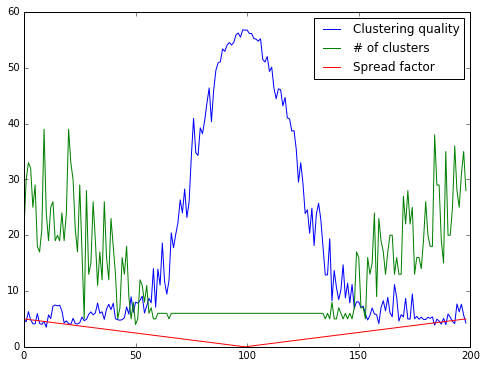

In [74]:
scd(100)